# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [2]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix


**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [15]:
# Load dataset into dataframe 
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [16]:
# Basic dataset exploration
print(df.shape)
print(df.info())

# Check for missing data and duplicates
print(df.isna().sum())
df.drop_duplicates(inplace=True)

# Use .describe() to get statistical summaries
print(df.describe())


(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [19]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


Use `.describe()`.

In [20]:
# Use .describe()
### YOUR CODE HERE ###
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [21]:
# Check the format of the data
### YOUR CODE HERE ###
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [23]:
# Convert datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [24]:
# Create `duration` column in minutes
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [30]:
# Outliers inspection
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

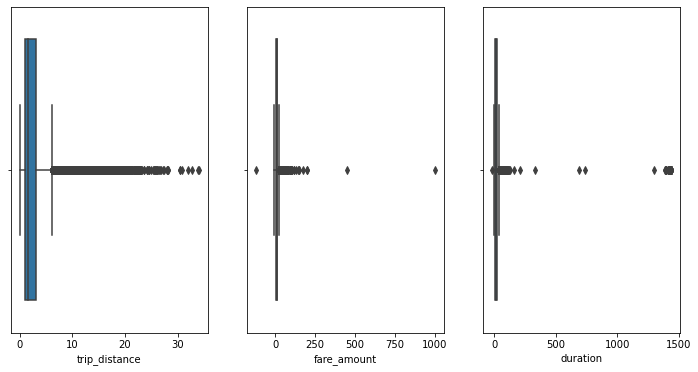

In [28]:
# Box plots for key features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(df['trip_distance'])
plt.subplot(1, 3, 2)
sns.boxplot(df['fare_amount'])
plt.subplot(1, 3, 3)
sns.boxplot(df['duration'])
plt.show()


**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

==> ENTER YOUR RESPONSE HERE

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [31]:
# Trip distance imputations
# Check if zero distances are due to rounding or other issues
zero_distance_rides = df[df['trip_distance'] == 0]
print(zero_distance_rides.head())


     Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
128    52987734         1  2017-06-22 08:05:33   2017-06-22 08:05:40   
246    78660848         1  2017-09-18 20:50:53   2017-09-18 20:51:03   
291    83480088         1  2017-10-04 19:46:24   2017-10-04 19:46:50   
319    14024301         1  2017-02-22 04:01:44   2017-02-22 04:01:53   
424     3767951         1  2017-01-14 07:00:26   2017-01-14 07:00:53   

     passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
128                1            0.0           3                  N   
246                1            0.0           1                  N   
291                1            0.0           1                  N   
319                1            0.0           1                  N   
424                1            0.0           1                  N   

     PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
128           231           231             2         20.0    0.0   

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [32]:
# Fare amount outliers
# Impute negative fare amounts with 0
df['fare_amount'] = df['fare_amount'].apply(lambda x: 0 if x < 0 else x)

#### `fare_amount` outliers

In [33]:
# Impute high fare outliers based on IQR
fare_Q3 = df['fare_amount'].quantile(0.75)
fare_IQR = df['fare_amount'].quantile(0.75) - df['fare_amount'].quantile(0.25)
fare_upper_limit = fare_Q3 + (6 * fare_IQR)
df['fare_amount'] = df['fare_amount'].apply(lambda x: fare_upper_limit if x > fare_upper_limit else x)

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [37]:
# Impute negative fare amounts with 0
df['fare_amount'] = df['fare_amount'].apply(lambda x: 0 if x < 0 else x)

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [41]:

# Impute high fare outliers based on IQR
# Already calculated fare_Q3 and fare_IQR
# Impute high fare outliers based on IQR
df['fare_amount'] = df['fare_amount'].apply(lambda x: fare_upper_limit if x > fare_upper_limit else x)

def impute_outliers(df, column_list, iqr_factor):
    for column in column_list:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + (iqr_factor * IQR)

        # Impute upper outliers
        df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)

        # Optionally, handle lower outliers
        lower_limit = Q1 - (iqr_factor * IQR)
        df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else x)

# Example usage
columns_to_impute = ['fare_amount', 'trip_distance', 'duration']
impute_outliers(df, columns_to_impute, 6)


#### `duration` outliers


In [42]:
# Impute high duration outliers based on IQR
duration_Q3 = df['duration'].quantile(0.75)
duration_IQR = df['duration'].quantile(0.75) - df['duration'].quantile(0.25)
duration_upper_limit = duration_Q3 + (6 * duration_IQR)
df['duration'] = df['duration'].apply(lambda x: duration_upper_limit if x > duration_upper_limit else x)


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [ ]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###

In [ ]:
# Impute the high outliers
### YOUR CODE HERE ###

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [43]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [44]:
# Group by `pickup_dropoff` and calculate mean distance
grouped = df.groupby('pickup_dropoff')['trip_distance'].mean()


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [45]:
# Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()


# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [47]:
# Create `mean_distance` column and map the mean distances
df['mean_distance'] = df['pickup_dropoff'].map(grouped_dict)

# Impute negative durations with 0
df['duration'] = df['duration'].apply(lambda x: 0 if x < 0 else x)

# Impute high duration outliers based on IQR
duration_Q3 = df['duration'].quantile(0.75)
duration_IQR = df['duration'].quantile(0.75) - df['duration'].quantile(0.25)
duration_upper_limit = duration_Q3 + (6 * duration_IQR)
df['duration'] = df['duration'].apply(lambda x: duration_upper_limit if x > duration_upper_limit else x)


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [48]:
# Group by `pickup_dropoff` and calculate mean duration
grouped_duration = df.groupby('pickup_dropoff')['duration'].mean()

# Convert `grouped_duration` to a dictionary
grouped_duration_dict = grouped_duration.to_dict()

# Create `mean_duration` column and map the mean durations
df['mean_duration'] = df['pickup_dropoff'].map(grouped_duration_dict)


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [49]:
# Create 'day' and 'month' columns
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month_name()


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [55]:
# Group by `pickup_dropoff` and calculate mean duration
grouped_duration = df.groupby('pickup_dropoff')['duration'].mean()

# Convert `grouped_duration` to a dictionary
grouped_duration_dict = grouped_duration.to_dict()

# Create `mean_duration` column and map the mean durations
df['mean_duration'] = df['pickup_dropoff'].map(grouped_duration_dict)


In [54]:
# Create 'day' and 'month' columns
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month_name()


In [53]:
# Define a function to identify rush hours
def rush_hourizer(row):
    if row['day'] in ['Saturday', 'Sunday']:
        return 0
    hour = row['tpep_pickup_datetime'].hour
    return 1 if (6 <= hour <= 10) or (16 <= hour <= 20) else 0

# Apply the function to create 'rush_hour' column
df['rush_hour'] = df.apply(rush_hourizer, axis=1)


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

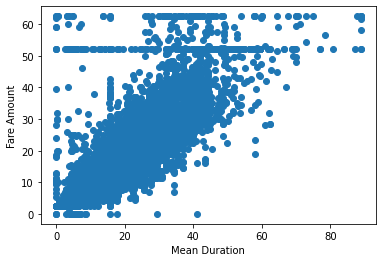

In [56]:
# Scatter plot
plt.scatter(df['mean_duration'], df['fare_amount'])
plt.xlabel('Mean Duration')
plt.ylabel('Fare Amount')
plt.show()


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [58]:
# Investigate specific fare amounts
specific_fares = df[df['fare_amount'].isin([52, 62.5])]



Examine the first 30 of these trips.

In [59]:
print(specific_fares.head(30))

     Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
11     18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   
21     85505540         2  2017-10-11 12:34:49   2017-10-11 13:22:38   
29     94052446         2  2017-11-06 20:30:50   2017-11-07 00:00:00   
110    47959795         1  2017-06-03 14:24:57   2017-06-03 15:31:48   
161    95729204         2  2017-11-11 20:16:16   2017-11-11 20:17:14   
174    53109134         1  2017-06-22 14:22:05   2017-06-22 16:07:28   
176    50046493         2  2017-06-13 20:05:03   2017-06-13 20:42:53   
247   103404868         2  2017-12-06 23:37:08   2017-12-07 00:06:19   
316    61694138         2  2017-07-20 13:21:55   2017-07-20 14:21:20   
379    80479432         2  2017-09-24 23:45:45   2017-09-25 00:15:14   
388    16226157         1  2017-02-28 18:30:05   2017-02-28 19:09:55   
406    55253442         2  2017-06-05 12:51:58   2017-06-05 13:07:35   
414    12955020         2  2017-02-18 12:44:04   2017-02-18 13:2

**Question:** What do you notice about the first 30 trips?

    We need to reset the index after removing rows of data. 

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [60]:
# Dropping unnecessary columns
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_dropoff'], axis=1, inplace=True)


In [ ]:
### YOUR CODE HERE ###

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

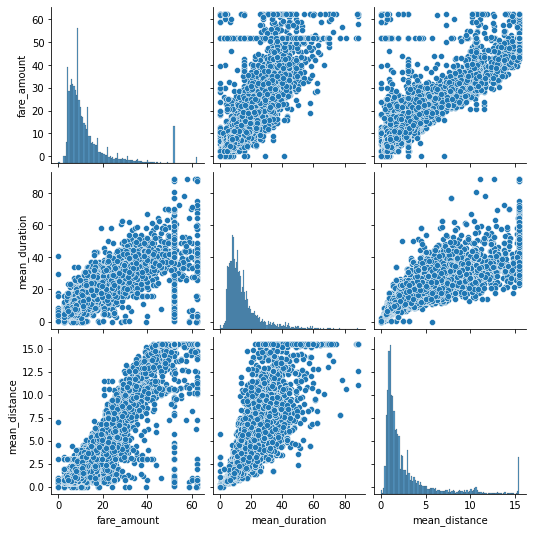

In [61]:
# Pair plot
sns.pairplot(df[['fare_amount', 'mean_duration', 'mean_distance']])
plt.show()


These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [63]:
# Correlation matrix
corr_matrix = df[['fare_amount', 'mean_duration', 'mean_distance']].corr()
print(corr_matrix)



               fare_amount  mean_duration  mean_distance
fare_amount       1.000000       0.859105       0.913404
mean_duration     0.859105       1.000000       0.885492
mean_distance     0.913404       0.885492       1.000000


Visualize a correlation heatmap of the data.

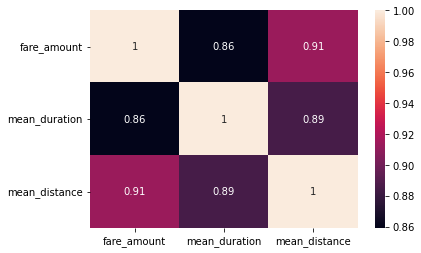

In [64]:

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [66]:
# Set your X and y variables
X = df.drop(columns='fare_amount')
y = df['fare_amount']

# Display first few rows to confirm
print(X.head())
print(y.head())


   Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  \
0    24870114         2                6           3.34           1   
1    35634249         1                1           1.80           1   
2   106203690         1                1           1.00           1   
3    38942136         2                1           3.70           1   
4    30841670         2                1           4.37           1   

  store_and_fwd_flag  PULocationID  DOLocationID  payment_type  extra  ...  \
0                  N           100           231             1    0.0  ...   
1                  N           186            43             1    0.0  ...   
2                  N           262           236             1    0.0  ...   
3                  N           188            97             1    0.0  ...   
4                  N             4           112             2    0.5  ...   

   tip_amount  tolls_amount  improvement_surcharge  total_amount   duration  \
0        2.76           0

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

### Task 8b. Pre-process data


Dummy encode categorical variables

In [67]:
# Convert VendorID to string
df['VendorID'] = df['VendorID'].astype(str)

# Get dummies for categorical variables
X = pd.get_dummies(X)


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [68]:
from sklearn.model_selection import train_test_split

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [69]:
from sklearn.preprocessing import StandardScaler

# Standardize the X variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


### Fit the model

Instantiate your model and fit it to the training data.

In [70]:
from sklearn.linear_model import LinearRegression

# Fit your model to the training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the training data
y_train_pred = model.predict(X_train_scaled)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = model.score(X_train_scaled, y_train)

print(f'Training MAE: {mae_train}')
print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R^2: {r2_train}')


Training MAE: 0.8872088794702359
Training MSE: 7.23694891211149
Training RMSE: 2.690157785727724
Training R^2: 0.9352117378661376


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [72]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)


In [74]:
# Make predictions on the testing data
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = model.score(X_test_scaled, y_test)

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R^2: {r2_test}')

Test MAE: 0.8036033530969816
Test MSE: 3.654889792599843
Test RMSE: 1.9117766063533268
Test R^2: 0.9663907653112228


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [75]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results['Residual'] = results['Actual'] - results['Predicted']


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

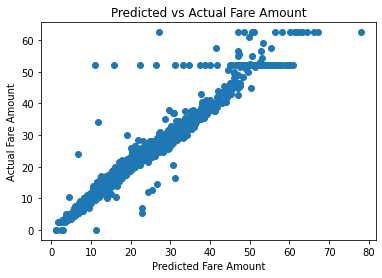

In [76]:
plt.scatter(results['Predicted'], results['Actual'])
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Actual Fare Amount')
plt.title('Predicted vs Actual Fare Amount')
plt.show()


Visualize the distribution of the `residuals` using a histogram.

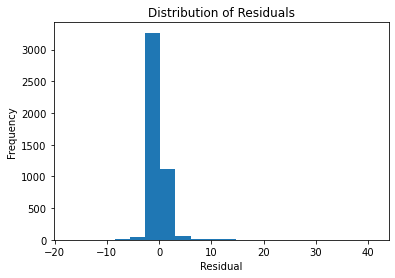

In [81]:
plt.hist(results['Residual'], bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()




In [82]:
# Calculate residual mean
residual_mean = results['Residual'].mean()
print(f'Residual Mean: {residual_mean}')

Residual Mean: -0.012952096140194273


Create a scatterplot of `residuals` over `predicted`.

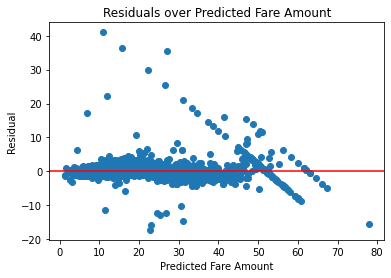

In [83]:
plt.scatter(results['Predicted'], results['Residual'])
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Residual')
plt.title('Residuals over Predicted Fare Amount')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [84]:
# Output the model's coefficients
coefficients = model.coef_
print(coefficients)

# Interpretation of coefficients
# Each coefficient corresponds to the feature in X_train
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {coefficients[idx]}")


[-3.26863520e-02 -3.86174198e-02 -1.12079354e-02  4.66688361e+00
  5.96868008e-01  5.92819969e-03 -1.24790580e-04 -2.99021099e-01
 -1.19094789e-01 -5.13282100e-01 -1.34330390e+00  2.59052105e-01
  3.17160825e-01  3.68474977e+00  2.42350030e+00  8.86354565e-01
  7.95275848e-02 -2.85556093e-03  5.47733374e+07  5.47733374e+07
  2.71710823e+09  2.54633551e+09  2.68746488e+09  2.58187398e+09
  2.69865860e+09  2.62918716e+09  2.71466305e+09 -1.42033891e+11
 -1.31916274e+11 -1.37696208e+11 -1.34634025e+11 -1.42393337e+11
 -1.32049575e+11 -1.40906958e+11 -1.44366196e+11 -1.40093851e+11
 -1.36219859e+11 -1.43029058e+11 -1.34027062e+11]
The coefficient for Unnamed: 0 is -0.03268635202359247
The coefficient for VendorID is -0.038617419776087736
The coefficient for passenger_count is -0.011207935395801427
The coefficient for trip_distance is 4.666883605552331
The coefficient for RatecodeID is 0.5968680082978168
The coefficient for PULocationID is 0.005928199691289385
The coefficient for DOLocation

What do these coefficients mean? How should they be interpreted?

==> ENTER YOUR RESPONSE HERE 

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 